<a href="https://colab.research.google.com/github/santiagonajera/Regresiones-Predicciones/blob/main/Regreiones_Predicciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regresión Lineal - Mean Squared Error: 4428.31, R^2 Score: 0.94
Árbol de Decisión - Mean Squared Error: 3000.00, R^2 Score: 0.96
Bosque Aleatorio - Mean Squared Error: 4842.27, R^2 Score: 0.94


<ipython-input-1-52f34b34ce5c>:64: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="red")
<ipython-input-1-52f34b34ce5c>:72: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="red")
<ipython-input-1-52f34b34ce5c>:80: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="red")


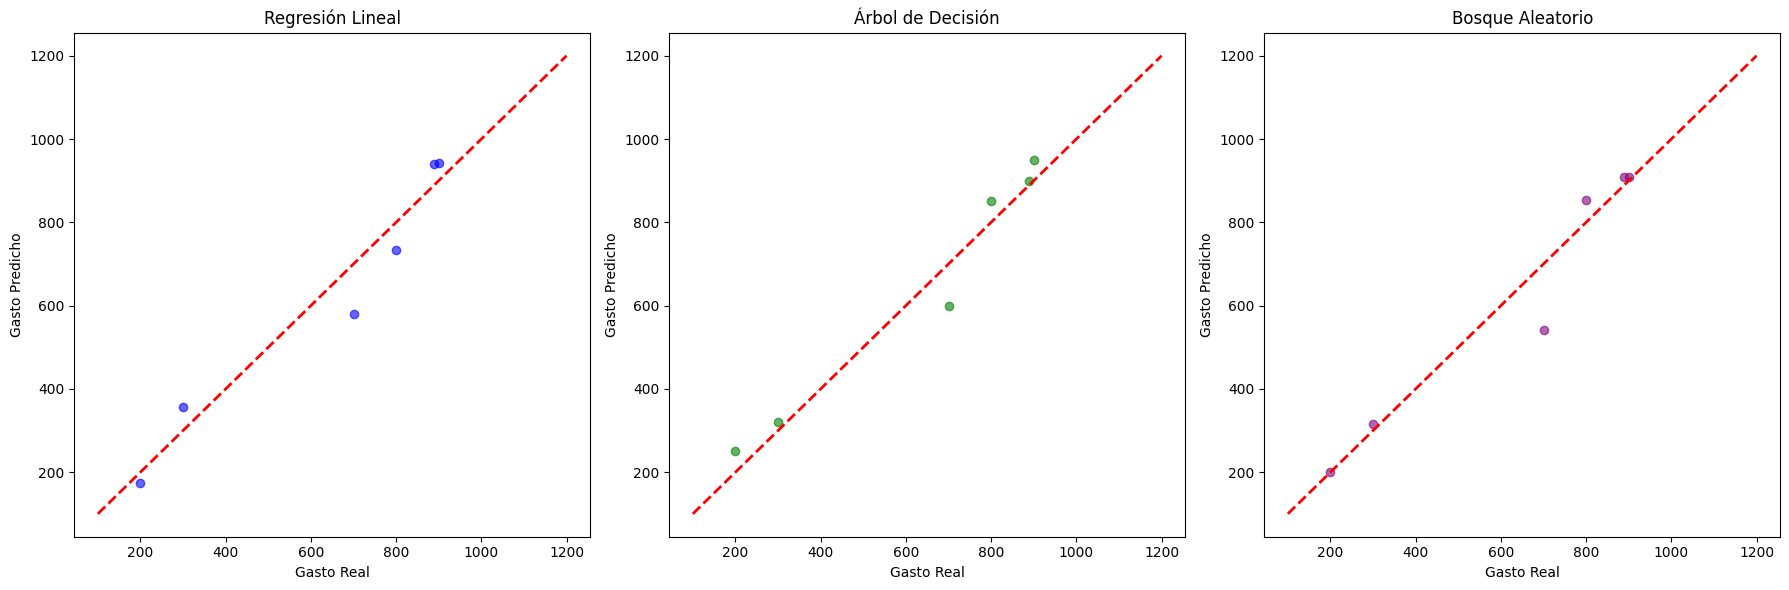

In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Datos de clientes
data = {
    'Edad': [25, 45, 35, 50, 23, 40, 60, 20, 30, 48, 55, 28, 38, 41, 33, 53,
             29, 52, 31, 47],
    'Ingreso_Anual': [50000, 80000, 60000, 90000, 45000, 70000, 100000, 40000,
                      65000, 85000, 95000, 54000, 67000, 71000, 62000, 89000,
                      58000, 92000, 63000, 87000],
    'Gasto_Estimado': [200, 800, 400, 900, 150, 700, 1200, 100, 300, 850,
                       950, 250, 450, 600, 350, 900, 280, 890, 320, 880]
}

# Convertimos los datos en un DataFrame de pandas
df = pd.DataFrame(data)

# Definimos las variables independientes (X) y la variable dependiente (y)
X = df[['Edad', 'Ingreso_Anual']]
y = df['Gasto_Estimado']

# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

# 1. Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# 2. Regresión con Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# 3. Regresión con Bosque Aleatorio
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

# Evaluación de los modelos
def print_metrics(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.2f}, R^2 Score: {r2:.2f}")

print_metrics(y_test, y_pred_linear, "Regresión Lineal")
print_metrics(y_test, y_pred_tree, "Árbol de Decisión")
print_metrics(y_test, y_pred_forest, "Bosque Aleatorio")

# Gráficas
plt.figure(figsize=(18, 6))

# Gráfica de Regresión Lineal
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, color="blue", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="red")
plt.xlabel("Gasto Real")
plt.ylabel("Gasto Predicho")
plt.title("Regresión Lineal")

# Gráfica de Árbol de Decisión
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_tree, color="green", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="red")
plt.xlabel("Gasto Real")
plt.ylabel("Gasto Predicho")
plt.title("Árbol de Decisión")

# Gráfica de Bosque Aleatorio
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_forest, color="purple", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="red")
plt.xlabel("Gasto Real")
plt.ylabel("Gasto Predicho")
plt.title("Bosque Aleatorio")

plt.tight_layout()
plt.show()
